In [1]:
import numpy as np
import matplotlib.pylab as plt
import math as math
from scipy.optimize import fmin
%matplotlib  notebook



<IPython.core.display.Javascript object>


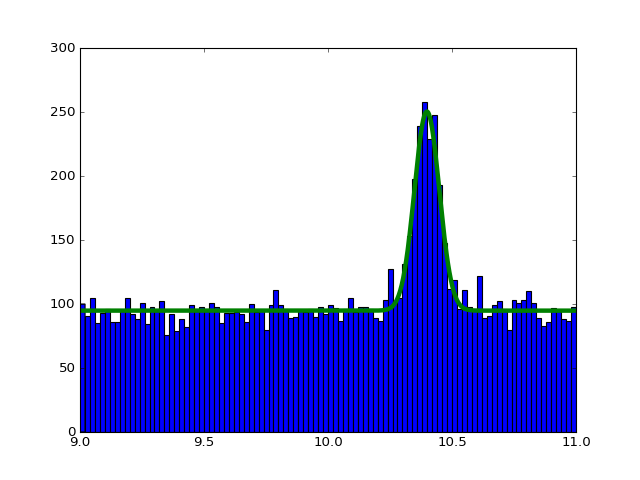

Optimization terminated successfully.
         Current function value: 6887.162643
         Iterations: 127
         Function evaluations: 220
[ 10.39863357   0.05010409   0.09696279]
nsig: 1018.1   nbkg: 9481.9


In [2]:

#Gaussian function
def Gaussian(x,mean,width):
    y = (1.0/(width*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*(width**2)))
    return y

#signal and background data
Nsig = 1000
sig_mean = 10.4
sig_width = 0.05
signal = np.random.normal(sig_mean,sig_width,Nsig)
Nbkg = 9500
background = 9.0+(2*np.random.random(Nbkg))
data = signal.copy()
data = np.append(data,background.copy())

# Here's a very simple plot of our data.
bins=100
plt.figure()
plt.hist(data,bins=bins)

#prob that event came from background
probability_background=.5

#inital values of parameters that fmin is going to start at
lower_mean=10.0
lower_width=0.02 
min_frac=0.04

#our function that will be minimized (using total probability)
def probability(params,x):
    mean = params[0]
    width = params[1]
    frac= params[2]
    signal_prob=(1.0/(width*np.sqrt(2*np.pi)))*np.exp(-(x-mean)**2/(2*(width**2)))
    tot_prob= -np.log(frac*signal_prob+ ((1-frac)*probability_background)).sum()
    return tot_prob

#using fmin
optimal_params=fmin(probability, [lower_mean,lower_width,min_frac],args=(data,), maxfun=10000 ,maxiter=10000)
print optimal_params
    
best_mean=optimal_params[0]
best_width=optimal_params[1]
best_frac=optimal_params[2]

#found the actual number of signal and background 
ndata = len(data)
nsig = best_frac*ndata
nbkg = (1-best_frac)*ndata
print "nsig: %.1f   nbkg: %.1f" % (nsig,nbkg)

#plotting the Gaussian function by taking the background data and the signal data
x = np.linspace(9.0,11.0,1000)
y = (nbkg/bins)*np.ones(len(x))+(Gaussian(x,best_mean,best_width)*(nsig/(bins*(best_mean*best_width))))

plt.plot(x,y, linewidth=4)
plt.show()
